XX

In [66]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install yellowbrick
!pip install setuptools

In [22]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib_inline as plt
import matplotlib.pyplot as plt


In [4]:
path = "/workspaces/A01_H09/marketing_campaign.csv"
df = pd.read_csv(path, sep = '\t')

df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# tarih verilerini pandas algilamadigi icin cevirmemiz lazim

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='mixed')

In [7]:
customer_data = df

In [8]:
dates = [
    i.date()
    for i in customer_data['Dt_Customer']
]

dates

[datetime.date(2012, 4, 9),
 datetime.date(2014, 8, 3),
 datetime.date(2013, 8, 21),
 datetime.date(2014, 10, 2),
 datetime.date(2014, 1, 19),
 datetime.date(2013, 9, 9),
 datetime.date(2012, 11, 13),
 datetime.date(2013, 8, 5),
 datetime.date(2013, 6, 6),
 datetime.date(2014, 3, 13),
 datetime.date(2013, 11, 15),
 datetime.date(2012, 11, 13),
 datetime.date(2013, 11, 15),
 datetime.date(2013, 11, 15),
 datetime.date(2012, 10, 10),
 datetime.date(2012, 11, 24),
 datetime.date(2012, 12, 24),
 datetime.date(2012, 8, 31),
 datetime.date(2013, 3, 28),
 datetime.date(2012, 3, 11),
 datetime.date(2012, 8, 8),
 datetime.date(2013, 6, 1),
 datetime.date(2012, 12, 23),
 datetime.date(2014, 11, 1),
 datetime.date(2013, 3, 18),
 datetime.date(2013, 2, 1),
 datetime.date(2013, 5, 27),
 datetime.date(2013, 2, 20),
 datetime.date(2013, 5, 31),
 datetime.date(2013, 11, 22),
 datetime.date(2014, 5, 22),
 datetime.date(2013, 11, 5),
 datetime.date(2012, 10, 10),
 datetime.date(2012, 10, 29),
 datetime.

In [9]:
dates[:5]

[datetime.date(2012, 4, 9),
 datetime.date(2014, 8, 3),
 datetime.date(2013, 8, 21),
 datetime.date(2014, 10, 2),
 datetime.date(2014, 1, 19)]

## Feature Engineering
### Musterilerin magazaya kac gundur kayit oldugunu hesapliyoruz

In [10]:
d1 = max(dates)
customer_data['Customer_for'] = [
    (d1-i).days
    for i in dates
]
customer_data['Customer_for'] = pd.to_numeric(customer_data['Customer_for'])
customer_data['Customer_for']

0       971
1       125
2       472
3        65
4       321
       ... 
2235    541
2236     61
2237    315
2238    316
2239    782
Name: Customer_for, Length: 2240, dtype: int64

In [11]:
'''
Bir sonraki bölümde, bazı yeni özellikleri tasarlamak için aşağıdaki adımları uygulayacağım:

* Bir müşterinin "Yaşını", ilgili kişinin doğum yılını belirten *"Yıl_Doğum"* ile çıkarın.
* Müşterinin iki yıl boyunca çeşitli kategorilerde harcadığı toplam tutarı belirten başka bir "Harcanan" özelliği oluşturun.
* Çiftlerin yaşam durumlarını çıkarmak için "Evlilik_Durumundan" başka bir "Yaşadığı_Şey" özelliği oluşturun.
* Bir hanedeki toplam çocukları, yani çocukları ve gençleri belirtmek için "Çocuklar" özelliğini oluşturun.
* Hanenin daha fazla netlik kazanması için "Aile_Boyutu" özelliğini oluşturma
* Ebeveynlik durumunu belirtmek için "Ebeveyn_Olmak" özelliğini oluşturma
* Son olarak, değer sayımlarını basitleştirerek "Eğitim" içinde üç kategori oluşturacağım.
* Gereksiz özelliklerden bazılarını kaldırma
'''

'\nBir sonraki bölümde, bazı yeni özellikleri tasarlamak için aşağıdaki adımları uygulayacağım:\n\n* Bir müşterinin "Yaşını", ilgili kişinin doğum yılını belirten *"Yıl_Doğum"* ile çıkarın.\n* Müşterinin iki yıl boyunca çeşitli kategorilerde harcadığı toplam tutarı belirten başka bir "Harcanan" özelliği oluşturun.\n* Çiftlerin yaşam durumlarını çıkarmak için "Evlilik_Durumundan" başka bir "Yaşadığı_Şey" özelliği oluşturun.\n* Bir hanedeki toplam çocukları, yani çocukları ve gençleri belirtmek için "Çocuklar" özelliğini oluşturun.\n* Hanenin daha fazla netlik kazanması için "Aile_Boyutu" özelliğini oluşturma\n* Ebeveynlik durumunu belirtmek için "Ebeveyn_Olmak" özelliğini oluşturma\n* Son olarak, değer sayımlarını basitleştirerek "Eğitim" içinde üç kategori oluşturacağım.\n* Gereksiz özelliklerden bazılarını kaldırma\n'

In [12]:
customer_data['Age'] = 2025 - customer_data['Year_Birth']
customer_data["Spent"] = customer_data["MntWines"] + customer_data["MntFruits"] + customer_data["MntMeatProducts"] + customer_data["MntFishProducts"] + customer_data["MntSweetProducts"] + customer_data["MntGoldProds"]
customer_data["Living_With"] = customer_data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
customer_data["Children"] = customer_data["Kidhome"] + customer_data["Teenhome"]
customer_data["Family_Size"] = customer_data["Living_With"].replace({"Alone": 1, "Partner":2}) + customer_data["Children"]
customer_data["Is_Parent"] = np.where(customer_data.Children > 0, 1, 0)
customer_data["Education"] = customer_data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

customer_data = customer_data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
customer_data = customer_data.drop(to_drop, axis=1)



/tmp/ipykernel_1999/263190601.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customer_data["Family_Size"] = customer_data["Living_With"].replace({"Alone": 1, "Partner":2}) + customer_data["Children"]


In [13]:
#customer_data.describe()
customer_data

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_for,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,971,68,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,125,71,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,472,60,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,65,41,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,321,44,422,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,541,58,1341,Partner,1,3,1
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,61,79,444,Partner,3,5,1
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,315,44,1241,Alone,0,1,0
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,316,69,843,Partner,1,3,1


In [14]:
# Mola 14:00-14:30

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

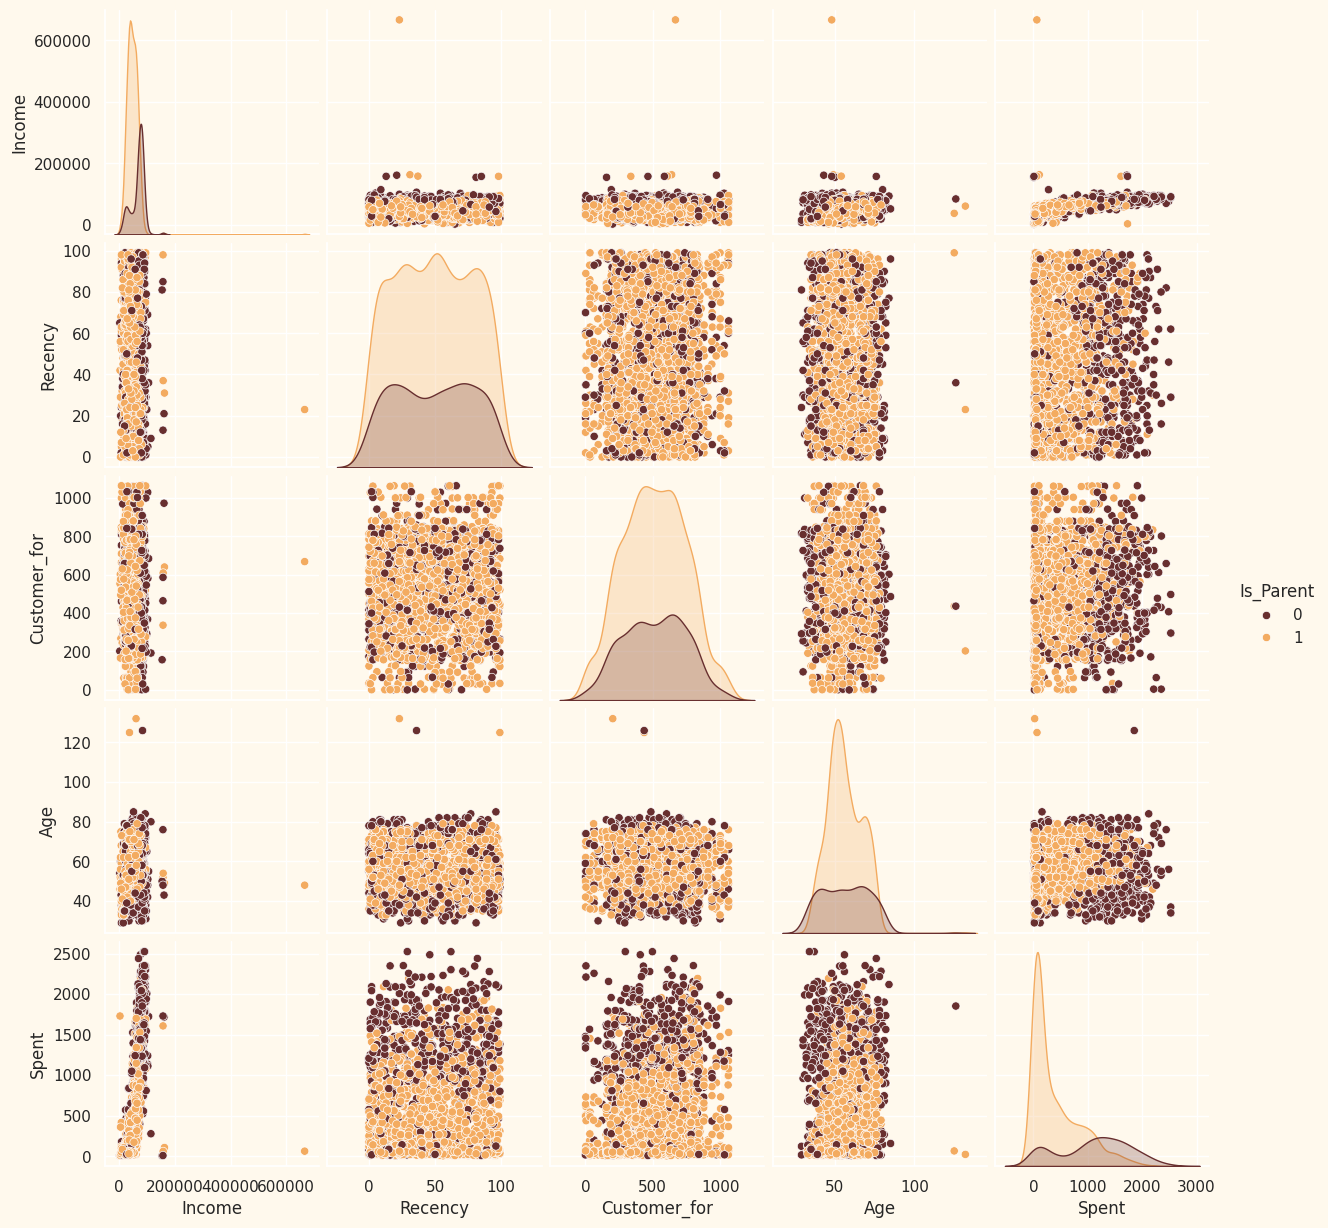

In [23]:
from matplotlib import colors

sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

# Plotting following features
To_Plot = [ "Income", "Recency", "Customer_for", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(customer_data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))

plt.show()

In [ ]:
# yas ve gelir tarafinda outlierlar siritiyor, onlari atalim.

customer_data = customer_data[(customer_data["Age"] < 90)]
customer_data = customer_data[(customer_data["Income"] < 600000)]
customer_data.shape  # kalan data 2212

(2212, 30)

In [ ]:
# Preprocessing (On Isleme) Kismi

In [29]:
object_cols = [
    col
    for col in customer_data.columns
    if customer_data[col].dtype == 'object'
]
object_cols

['Education', 'Living_With']

In [35]:
# encoding, string datalari sayisal hale getirme islemi

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in object_cols:
    customer_data[col] = label_encoder.fit_transform(customer_data[col])


In [37]:
customer_data[['Education', 'Living_With']]

,Education,Living_With
0,0,0
1,0,0
2,0,1
3,0,1
4,1,1
...,...,...
2235,0,1
2236,1,1
2237,0,0
2238,1,1


In [39]:
ds = customer_data.copy()

cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds), columns=ds.columns)


In [40]:
scaled_ds.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_for,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


In [ ]:
# Dimensionality reduction 
# cok fazla sutun oldugu icin bunun bunu indirgemek gerekiyor, iki uc mantiklidir

In [ ]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)  # orijinal metinde 3d gidiyor, biz iki boyuta indirdik
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2"]))
PCA_ds

,col1,col2
0,4.994347,-0.151247
1,-2.884455,-0.006676
2,2.617864,-0.720770
3,-2.676036,-1.541974
4,-0.649591,0.209848
...,...,...
2207,2.321341,2.436277
2208,-3.105957,4.020968
2209,2.673666,-1.869157
2210,1.494055,1.701855


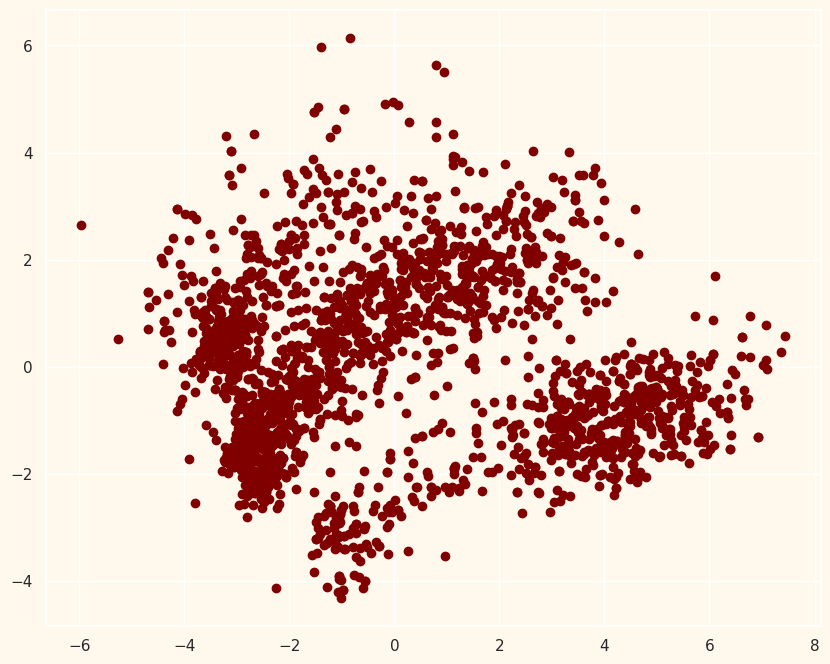

In [ ]:
x = PCA_ds["col1"]
y = PCA_ds["col2"]

# To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.scatter(x,y, c="maroon", marker="o" )
plt.show()

In [67]:
# artik kumelemeye gecebiliriz
import setuptools.dist
from yellowbrick.cluster import KElbowVisualizer

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

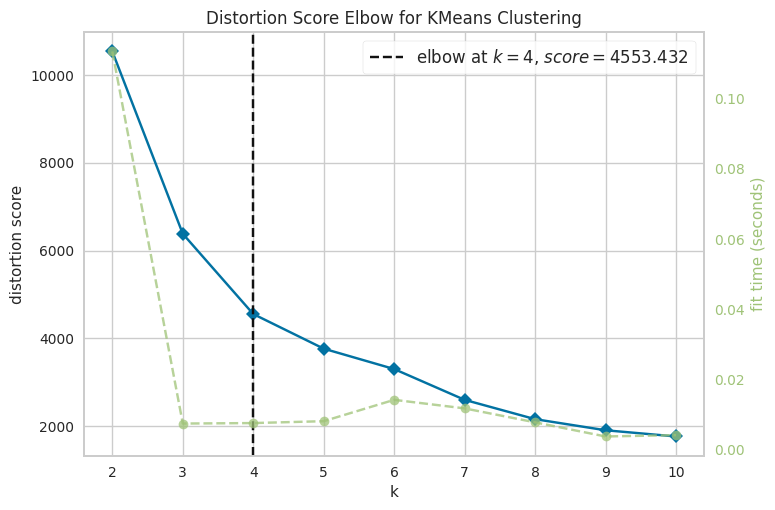

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [71]:
from sklearn.cluster import AgglomerativeClustering

AC = AgglomerativeClustering(n_clusters=4)

yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

customer_data["Clusters"] = yhat_AC

Text(0.5, 1.0, 'Distribution Of The Clusters')

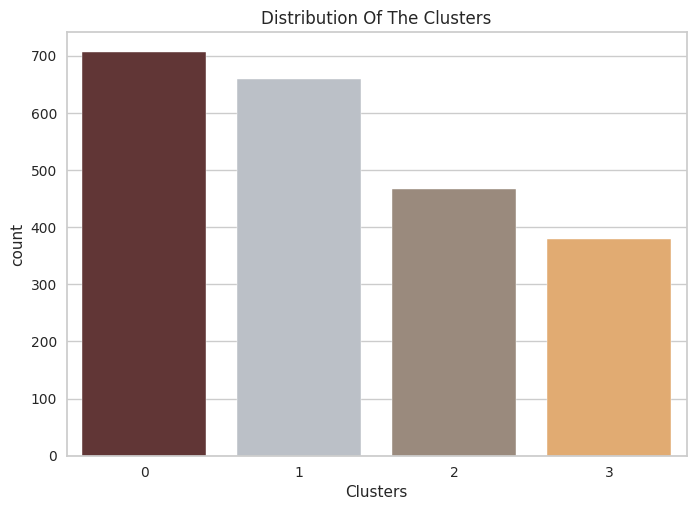

In [85]:
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=customer_data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")

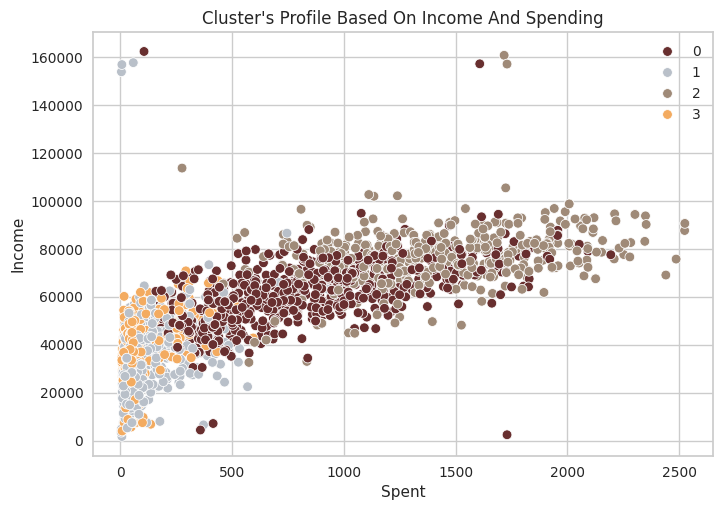

In [86]:
pl = sns.scatterplot(data = customer_data,x=customer_data["Spent"], y=customer_data["Income"],hue=customer_data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

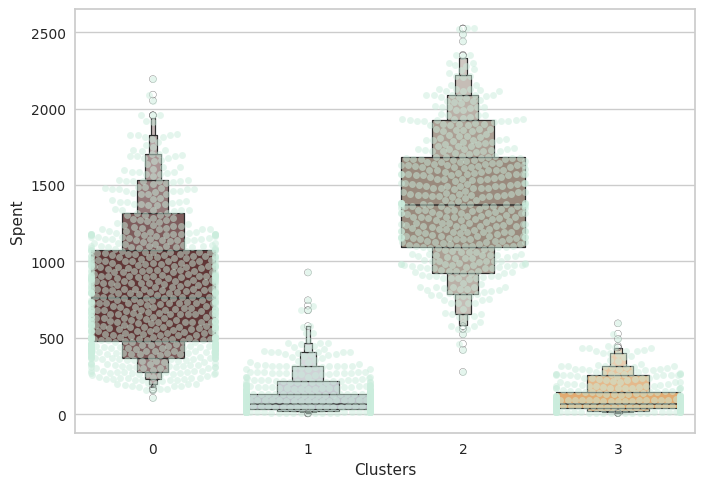

In [88]:
plt.figure()
pl=sns.swarmplot(x=customer_data["Clusters"], y=customer_data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=customer_data["Clusters"], y=customer_data["Spent"], palette=pal)
plt.show()

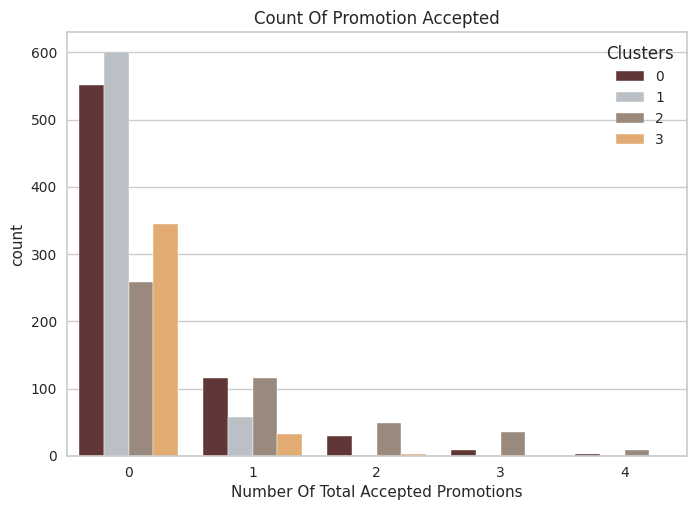

In [89]:

customer_data["Total_Promos"] = customer_data["AcceptedCmp1"] + customer_data["AcceptedCmp2"] + customer_data["AcceptedCmp3"] + customer_data["AcceptedCmp4"] + customer_data["AcceptedCmp5"]

plt.figure()
pl = sns.countplot(x=customer_data["Total_Promos"], hue=customer_data["Clusters"], palette=pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

In [90]:
'''
Kampanyalara şimdiye kadar çok büyük bir yanıt gelmedi. Genel olarak çok az katılımcı var. Dahası, hiçbir bölüm beşinin hepsini almıyor. Belki de satışları artırmak için daha iyi hedeflenmiş 
ve iyi planlanmış kampanyalar gerekiyor.
'''

'\nKampanyalara şimdiye kadar çok büyük bir yanıt gelmedi. Genel olarak çok az katılımcı var. Dahası, hiçbir bölüm beşinin hepsini almıyor. Belki de satışları artırmak için daha iyi hedeflenmiş \nve iyi planlanmış kampanyalar gerekiyor.\n'

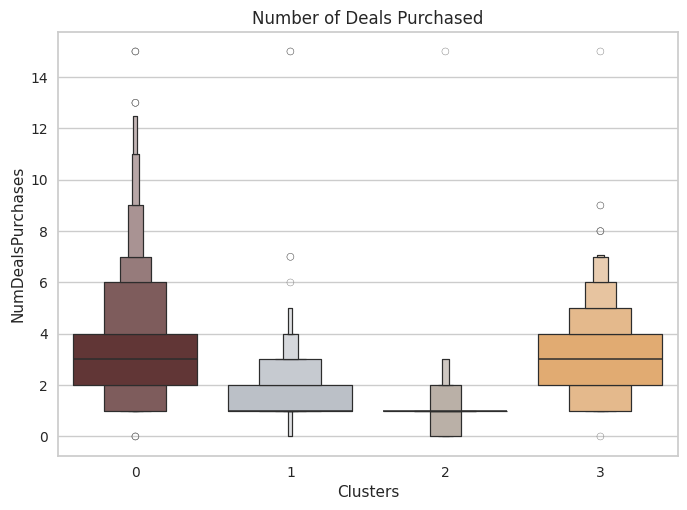

In [92]:
plt.figure()
pl=sns.boxenplot(y=customer_data["NumDealsPurchases"],x=customer_data["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

<Figure size 800x550 with 0 Axes>

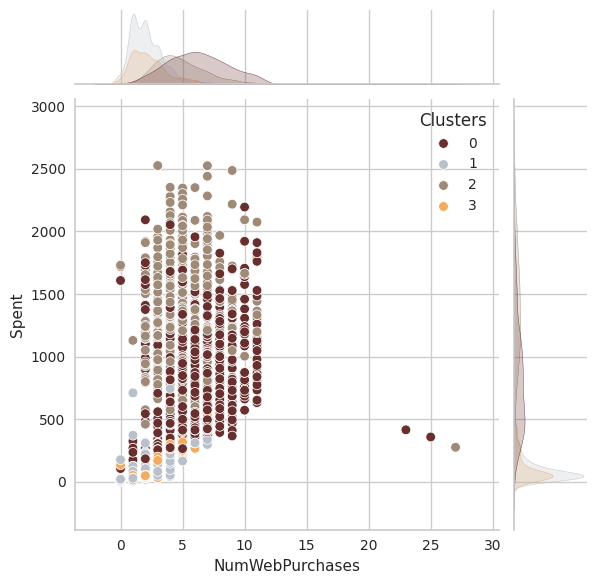

<Figure size 800x550 with 0 Axes>

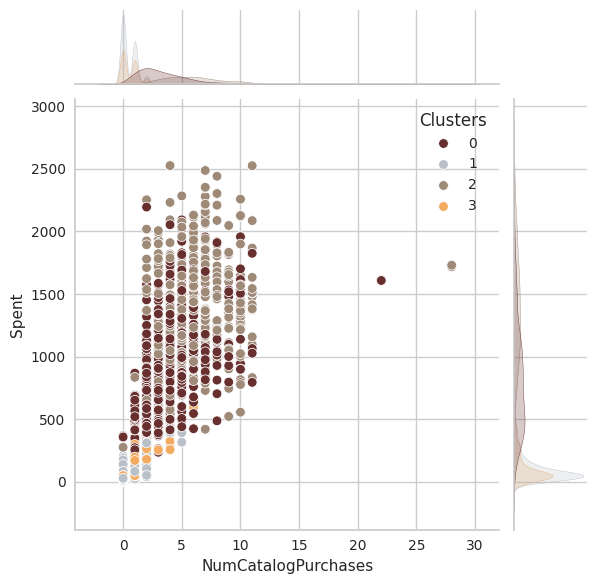

<Figure size 800x550 with 0 Axes>

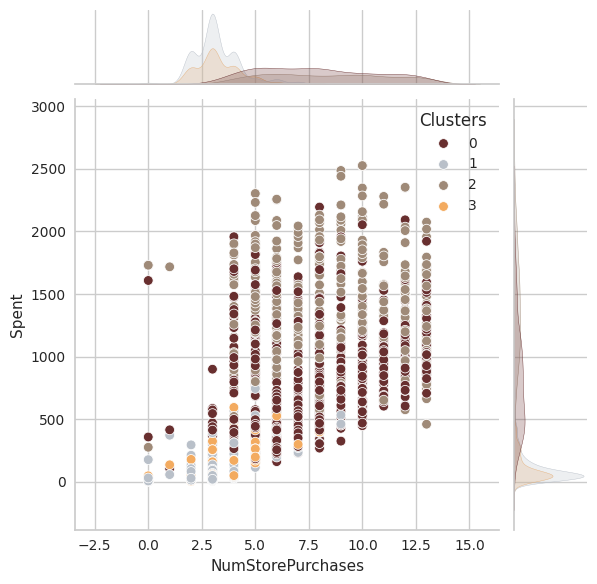

<Figure size 800x550 with 0 Axes>

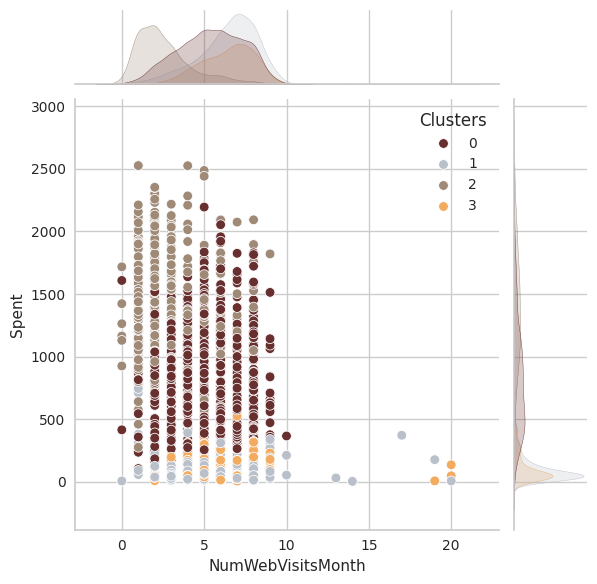

In [100]:
#for more details on the purchasing style
Places =["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",  "NumWebVisitsMonth"]

for i in Places:
    plt.figure()
    sns.jointplot(x=customer_data[i],y = customer_data["Spent"],hue=customer_data["Clusters"], palette= pal)
    plt.show()

<Figure size 800x550 with 0 Axes>

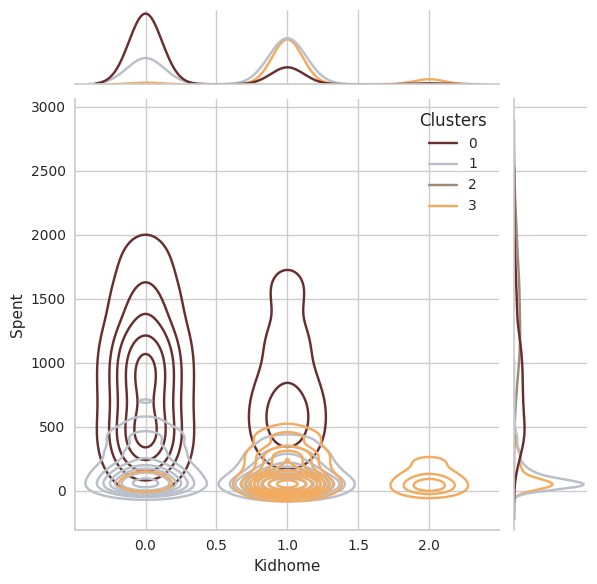

<Figure size 800x550 with 0 Axes>

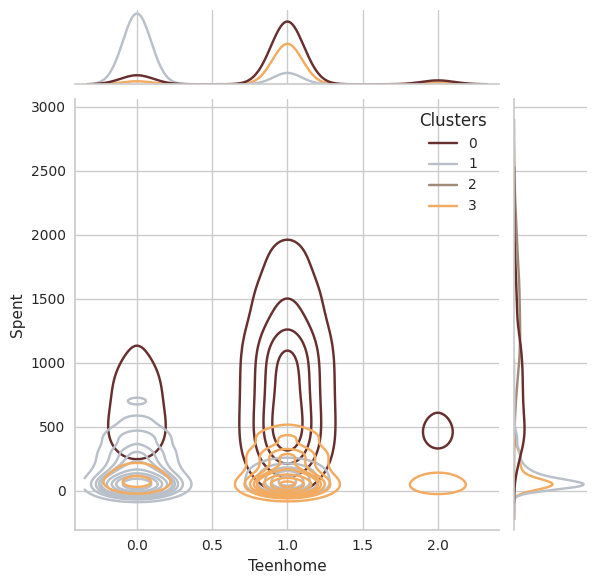

<Figure size 800x550 with 0 Axes>

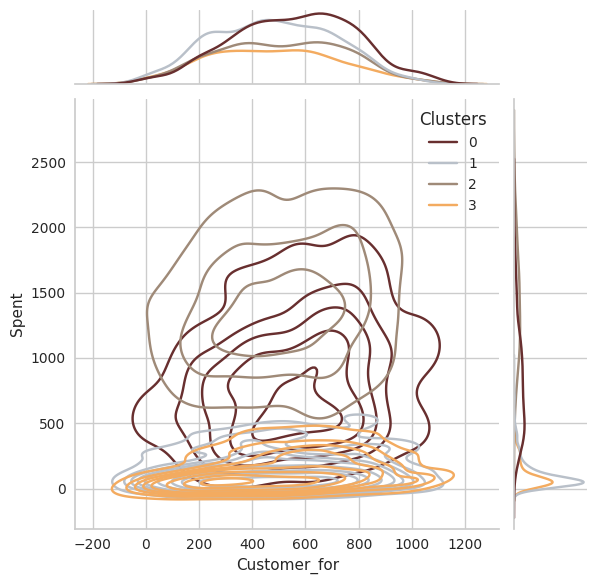

<Figure size 800x550 with 0 Axes>

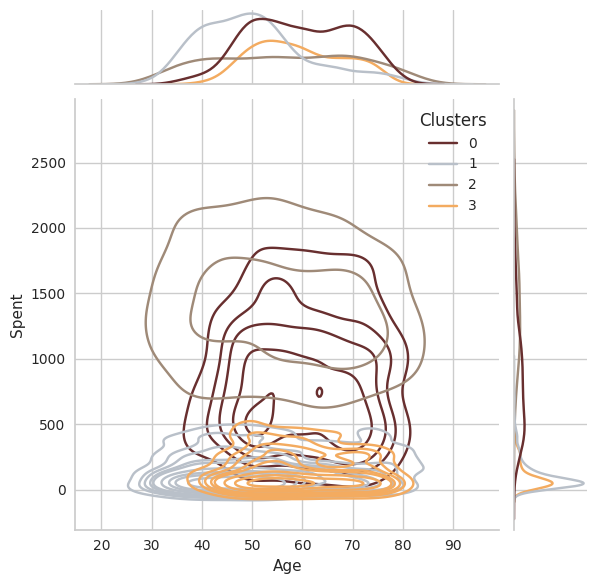

<Figure size 800x550 with 0 Axes>

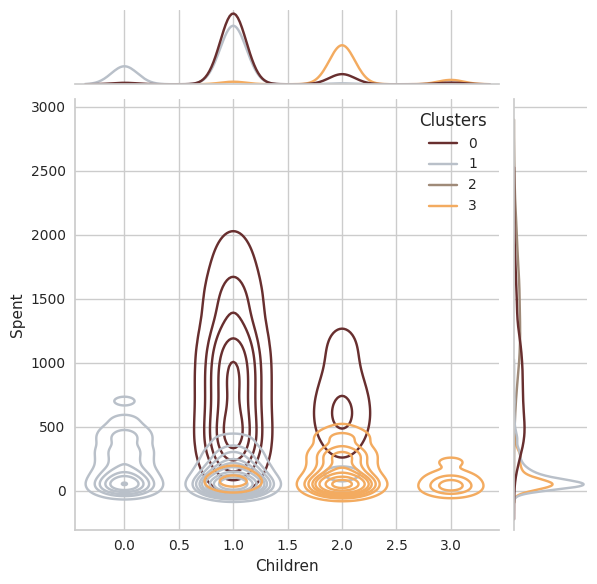

<Figure size 800x550 with 0 Axes>

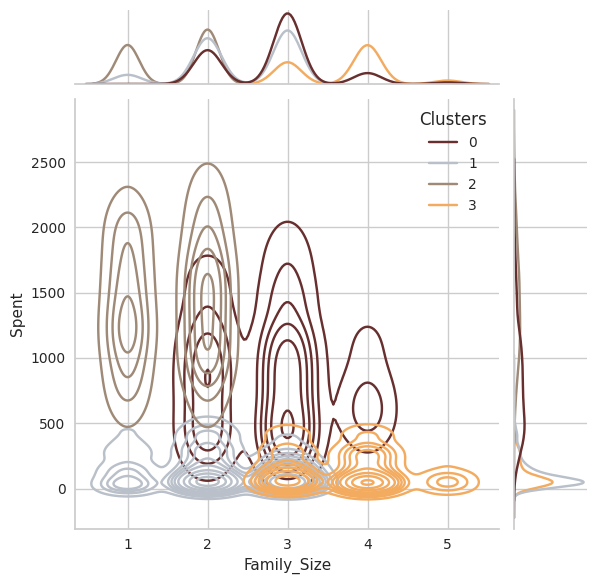

<Figure size 800x550 with 0 Axes>

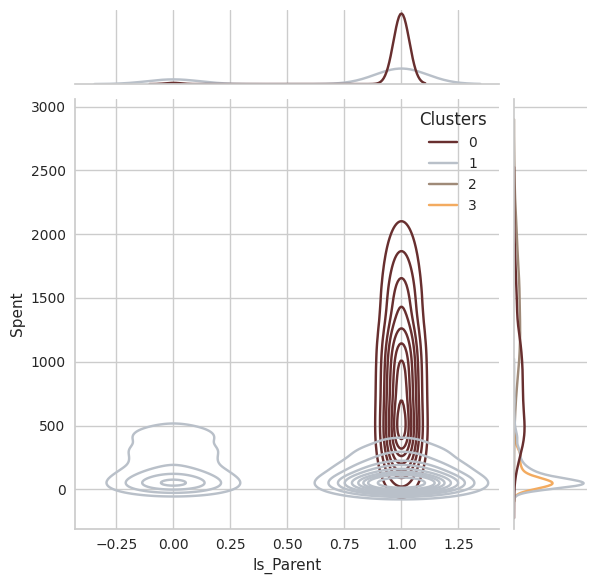

<Figure size 800x550 with 0 Axes>

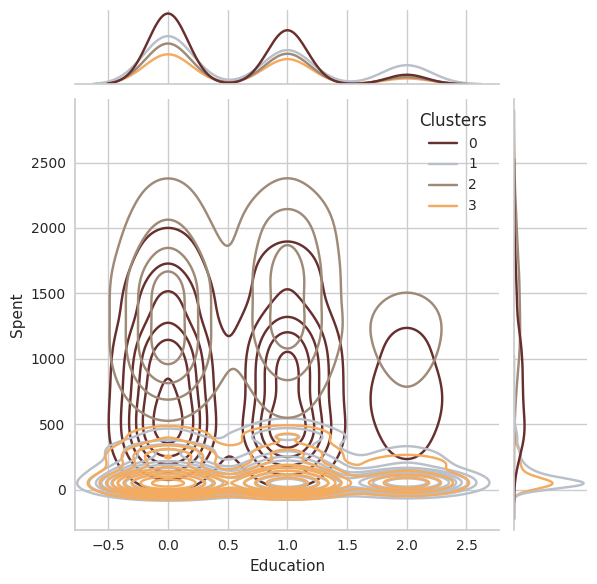

<Figure size 800x550 with 0 Axes>

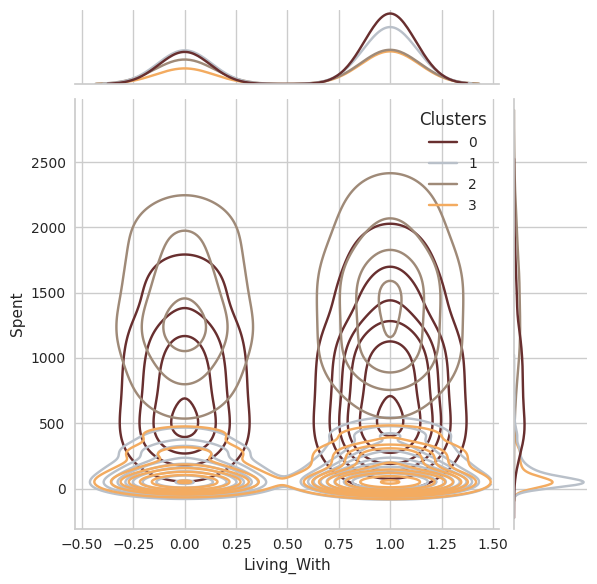

In [102]:
Personal = ["Kidhome","Teenhome","Customer_for", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=customer_data[i], y=customer_data["Spent"], hue=customer_data["Clusters"], kind="kde", palette=pal)
    plt.show()